# Regression Basics to Reality

It's not so simple in the real world

## Webinar Outcomes
* Multivariable Regression
* Data Processing
* Regularisation


**Definition and Applications:**

Linear regression is a statistical method used to model the relationship between two variables, where one variable is considered independent (predictor) and the other dependent (outcome). It's widely used in various fields such as economics, finance, healthcare, and more.

In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Multivariable Regression

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/damian-vather/data/master/winequality.csv?token=AOQJD62TI732EGDHQ2A7ZZS67MW4Q')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [ ]:
df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,0.246114,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,0.430779,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


Let's not do this

```python
df_new = df.fillna(0)
print("\nMissing values:")
print(df_new.isnull().sum())
```

### Statiscally accurate imputation

* **Imputting the mean**

The result will ensure we maintain the mean of the dataset without upsetting the distubtion dratically. Note this statement holds true while the perecentage missing values in less that 5%

* **Imputting the mode**

Ensures the imputation is closely align with the most likely possible outcome. This will effect the mean of the dataset and as a result will change the distribution

**Example**

In [ ]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Create a DataFrame with random data and introduce missing values
data = {
    'Column1': np.random.randint(1, 100, 1000),
    'Column2': np.random.normal(10, 2, 1000)}

data = pd.DataFrame(data)

In [ ]:
missing_percentage = 0.2
num_missing_values = int(len(data['Column2']) * missing_percentage)
missing_indices = np.random.choice(len(data['Column2']), num_missing_values, replace=False)
data['Column2'][missing_indices] = np.nan

<ipython-input-46-5518f1d5bdb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Column2'][missing_indices] = np.nan


In [ ]:
data.head()

,Column1,Column2
0,52,7.169595
1,93,11.190802
2,15,NaN
3,72,9.957050
4,61,8.765819


In [ ]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Column1      0
Column2    200
dtype: int64


In [ ]:
data["boring"] = data['Column2'].fillna(0)
data['mean'] = data['Column2'].fillna(data['Column2'].mean())
data['mode'] = data['Column2'].fillna(data['Column2'].mode())
data.head()

,Column1,Column2,boring,mean,mode
0,52,7.169595,7.169595,7.169595,7.169595
1,93,11.190802,11.190802,11.190802,11.190802
2,15,NaN,0.000000,10.194054,4.431992
3,72,9.957050,9.957050,9.957050,9.957050
4,61,8.765819,8.765819,8.765819,8.765819


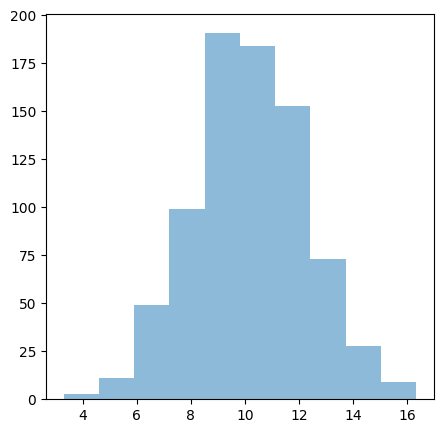

In [ ]:
df_new = data.dropna()
plt.figure(figsize=(5, 5))
plt.hist(df_new['Column2'], alpha=0.5, label='Original')
plt.show()

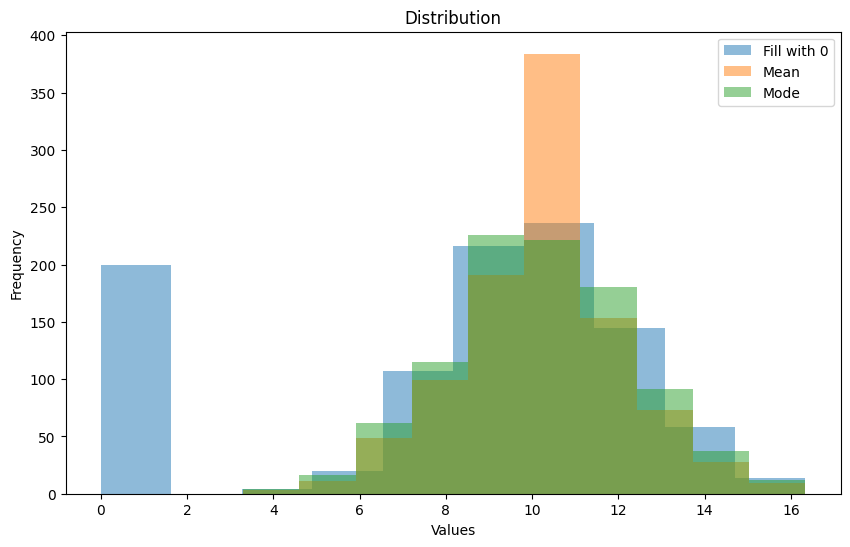

In [ ]:
plt.figure(figsize=(10, 6))

# Plot Columns
plt.hist(data['boring'], alpha=0.5, label='Fill with 0')
plt.hist(data['mean'], alpha=0.5, label='Mean')
plt.hist(data['mode'], alpha=0.5, label='Mode')

plt.title('Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Back to our orignal df

In [ ]:
df.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


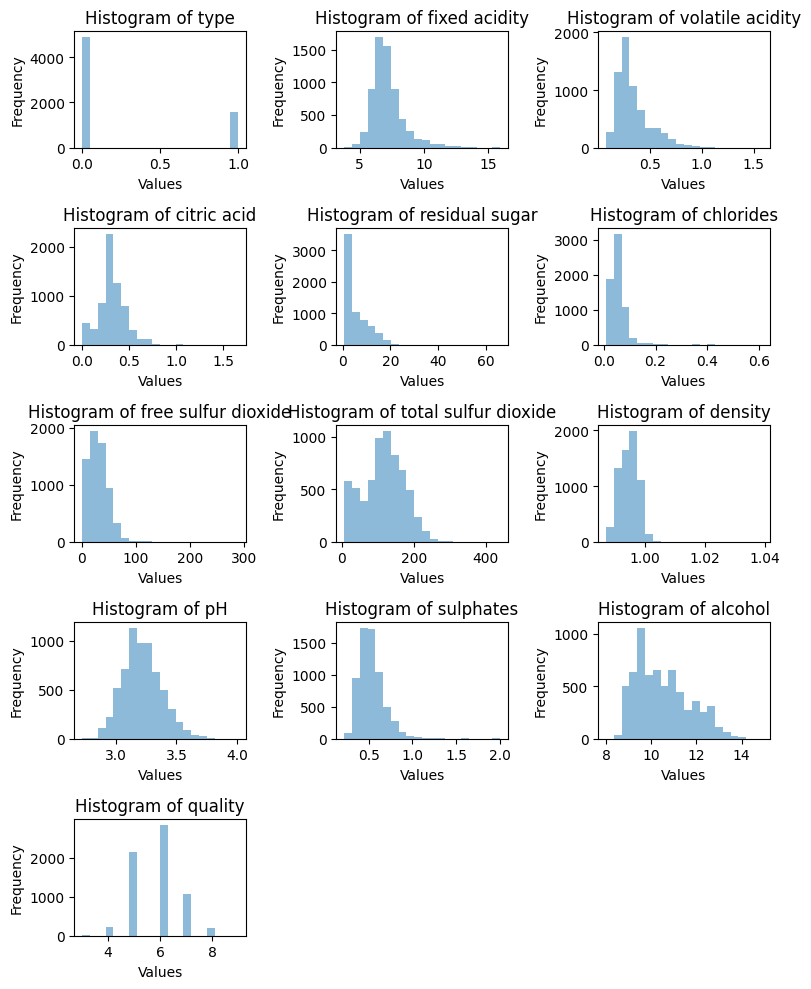

In [ ]:
num_cols = len(df.columns)
num_rows = (num_cols + 2) // 3
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(8, 2*num_rows))

for i, col in enumerate(df.columns):
    row_index = i // 3
    col_index = i % 3
    axes[row_index, col_index].hist(df[col].dropna(), bins=20, alpha=0.5)
    axes[row_index, col_index].set_title(f'Histogram of {col}')
    axes[row_index, col_index].set_xlabel('Values')
    axes[row_index, col_index].set_ylabel('Frequency')

# Remove empty subplots if the number of columns is not a multiple of 3
for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

### Processing Fixed Acidity

In [ ]:
df["fixed acidity"].describe()

count    6487.000000
mean        7.216579
std         1.296750
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64

In [ ]:
print(df["fixed acidity"].mode())
print(df["fixed acidity"].median())

0    6.8
Name: fixed acidity, dtype: float64
7.0


Due to all measure being within 1 std of each other the cause and effect of using either of the measure will have minimal impact on the dataset

In [ ]:
df_new = df.copy()
df_new["fixed acidity"] = df_new["fixed acidity"].fillna(df_new["fixed acidity"].median())

# Check for missing values
print("\nMissing values:")
print(df_new.isnull().sum())


Missing values:
type                    0
fixed acidity           0
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64


## Let's break the model

In [ ]:
X = df_new.drop(columns=['quality'])  # Features
y = df_new['quality']  # Target variable

### Splitting data

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Missing data is a problem

We need to more often that not handle missing data unless we have some cool models up our sleeve

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Create and train the HistGradientBoostingRegressor
model = HistGradientBoostingRegressor()

#Train
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_test)

#Evaluate
mse_new = mean_squared_error(y_test, y_pred)
r2_new = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_new)
print("R-squared Score:", r2_new)


Mean Squared Error: 0.4039352011466473
R-squared Score: 0.46990089919323574


## Process and Fix remaining data

In [ ]:
df_new = df_new.fillna(0)
# Check for missing values
print("\nMissing values:")
print(df_new.isnull().sum())
X = df_new.drop(columns=['quality'])  # Features
y = df_new['quality']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Missing values:
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Using a cool package

```python
#Imports
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Create a pipeline with imputation and linear regression
model = make_pipeline(SimpleImputer(strategy='mean'), LinearRegression())
```

As the model finds missing values it will impute them accordingly

### The best thing you will ever learn

How to train multiple models at once

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

### Name all the models as a list

In [ ]:
names = ['Linear','Lasso','Ridge','Decision','Random Forest','MLP']

### Initialise all models

In [ ]:
Regressors =[
    LinearRegression(),
    Lasso(),
    Ridge(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    MLPRegressor()
]

### Magic Function

In [ ]:
results = []
models = {}
for name, reg in zip(names, Regressors):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o reg.fit(X_train, y_train)

    print ('... predicting')
    y_pred = reg.predict(X_test)

    print ('... scoring')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)



    # save the results to dictionaries
    models[name] = reg

    results.append([name, mse, r2, run_time.best])

results = pd.DataFrame(results, columns=['Regressors', 'MSE', "R-Squared", 'Train Time'])
results.set_index('Regressors', inplace= True)

Fitting Linear model...
... predicting
... scoring
Fitting Lasso model...
... predicting
... scoring
Fitting Ridge model...
... predicting
... scoring
Fitting Decision model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting MLP model...
... predicting
... scoring


In [ ]:
df = pd.DataFrame(results)
df = df.reset_index()
df.sort_values('R-Squared', ascending=False)

,Regressors,MSE,R-Squared,Train Time
4,Random Forest,0.354922,0.534223,3.235525
0,Linear,0.533504,0.299863,0.007165
5,MLP,0.533696,0.299611,2.207105
2,Ridge,0.536523,0.295901,0.003362
3,Decision,0.688462,0.096506,0.049494
1,Lasso,0.760476,0.001999,0.004350


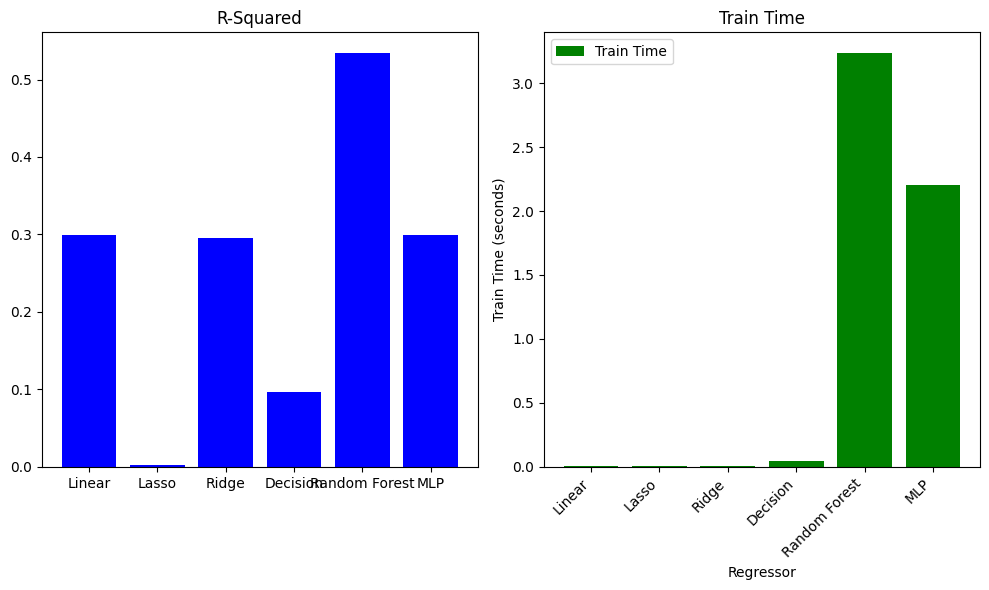

In [ ]:
plt.figure(figsize=(10, 6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.bar(df['Regressors'], df['R-Squared'], color='blue', label='R-Squared')
ax2.bar(df['Regressors'], df['Train Time'], color='green', label='Train Time')

plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.xlabel('Regressor')
plt.ylabel('R-Squared')
ax1.set_title('R-Squared')

plt.ylabel('Train Time (seconds)')
ax2.set_title('Train Time')
plt.legend()
plt.tight_layout()
plt.show()

# Reflections

Random Forest is the best however has the longest run time

### Why did it work

![](https://anasbrital98.github.io/assets/img/20/random-forest.jpg)

Because it operates on probability and not linear assumption it handles none linear data well

### Regularistation

Well we already did it with LASSO and RIDGE. Let me explain

L1 -> Lasso
L2 -> Ridge

**L2 (Ridge)**

We’re going to minimize the sum of squared errors and sum of the squared coefficients

![](https://editor.analyticsvidhya.com/uploads/90026RR.png)


**L1 (Lasso)**
Is very similar to Ridge Regression, with little difference in Penalty Factor that coefficient is magnitude instead of squared

![](https://editor.analyticsvidhya.com/uploads/20996LRR.png)

It's aim it to generalise and bend the graph

![](https://editor.analyticsvidhya.com/uploads/83837impact%20of%20req.png)

## What does all this mean

Ridge will optimise coeffients where as Lasso will make them 0

In [ ]:
linear = LinearRegression()
linear.fit(X_train,y_train)
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [ ]:
df_new.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
coefficients_list = [linear.coef_, ridge.coef_, lasso.coef_]
column_names = ['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',]

df = pd.DataFrame(coefficients_list, columns=column_names)
new_index = ['linear', 'ridge', 'lasso']
df = df.set_axis(new_index, axis=0, inplace=False)
df

<ipython-input-140-54403ede5f09>:8: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_index, axis=0, inplace=False)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
linear,0.345854,0.053563,-1.498551,-0.150667,0.050649,-1.114492,0.005677,-0.001668,-69.209453,0.134090,0.709396,0.263406
ridge,0.164946,0.004439,-1.538409,-0.164543,0.024999,-1.108188,0.006160,-0.001956,-0.640293,0.001456,0.602195,0.337186
lasso,-0.000000,-0.000000,-0.000000,0.000000,0.011053,-0.000000,0.007770,-0.001439,-0.000000,-0.000000,0.000000,0.272016


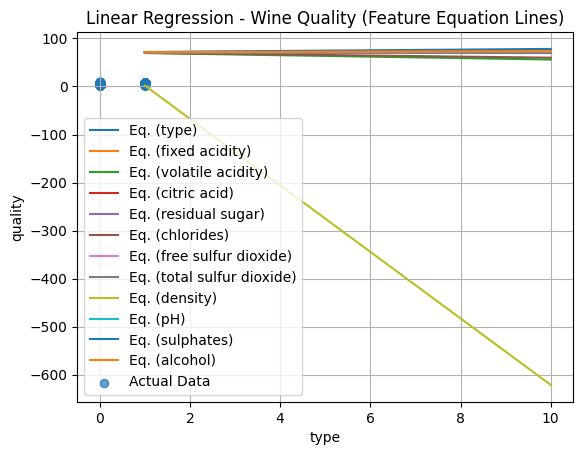

In [ ]:
x_range = np.linspace(1, 10, 10)

# Function to plot the equation line for a feature
def plot_equation_line(feature_name, x_range, model):
  slope = linear.coef_[features.get_loc(feature_name)]  # Get slope for specific feature
  intercept = linear.intercept_
  equation_y = slope * x_range + intercept
  plt.plot(x_range, equation_y, label='Eq. (' + feature_name + ')')

# Plot equation lines for all features
for feature in features:
  plot_equation_line(feature, x_range.copy(), model)  # Copy to avoid modifying original x_range

# Plot the actual data (optional)
plt.scatter(X[features[0]], y, alpha=0.7, label='Actual Data')  # Adjust feature name

# Add labels and title
plt.xlabel(features[0])  # Assuming the first feature is on the x-axis
plt.ylabel(target)
plt.title('Linear Regression - Wine Quality (Feature Equation Lines)')

# Customize the plot
plt.legend()
plt.grid(True)

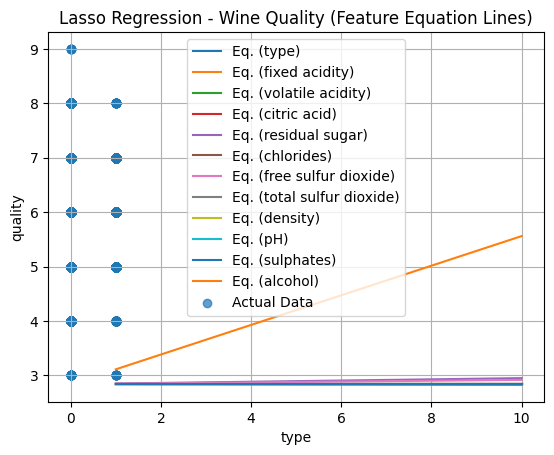

In [ ]:
x_range = np.linspace(1, 10, 10)

# Function to plot the equation line for a feature
def plot_equation_line(feature_name, x_range, model):
  slope = lasso.coef_[features.get_loc(feature_name)]  # Get slope for specific feature
  intercept = lasso.intercept_
  equation_y = slope * x_range + intercept
  plt.plot(x_range, equation_y, label='Eq. (' + feature_name + ')')

# Plot equation lines for all features
for feature in features:
  plot_equation_line(feature, x_range.copy(), model)  # Copy to avoid modifying original x_range

# Plot the actual data (optional)
plt.scatter(X[features[0]], y, alpha=0.7, label='Actual Data')  # Adjust feature name

# Add labels and title
plt.xlabel(features[0])  # Assuming the first feature is on the x-axis
plt.ylabel(target)
plt.title('Lasso Regression - Wine Quality (Feature Equation Lines)')

# Customize the plot
plt.legend()
plt.grid(True)

## Webinar Outcomes
* Multivariable Regression
* Data Processing
* Regularisation